In [1]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics

In [2]:
iris = sns.load_dataset("iris")

In [3]:
#Visulaize how is the data arranged
print(iris)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [4]:
#Define your features and your learning target
y = iris.species
X = iris.drop('species',axis=1)

In [5]:
#Divide your sets in training and test
train_x, test_x, train_y, test_y = train_test_split(X,y,test_size=0.30)
print(f"Shape of train set is {train_x.shape}")
print(f"Shape of test set is {test_x.shape}")
print(f"Shape of train label is {train_y.shape}")
print(f"Shape of test labels is {test_y.shape}")

Shape of train set is (105, 4)
Shape of test set is (45, 4)
Shape of train label is (105,)
Shape of test labels is (45,)


In [6]:
#Define your model

"""Logistic regression uses maximum likelihood, if you plot any data point in a logistic plot, it will have some measure along the x-axis, and the probability of that measure being either true or false on the y-axis. True or false, meaning 1 for true and 0 for false.

Logistic regression is almost always used for classification, and that is the typical use-case."""

model = LogisticRegression()


The accuracy on the tests set is 0.8888888888888888
C:\Users\Tysh\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


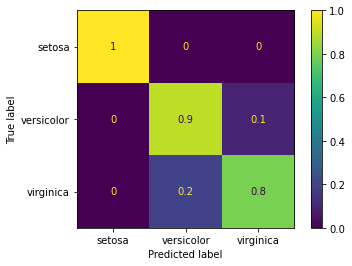

In [7]:
#Fit and test
model.fit(train_x, train_y)
print(f"The accuracy on the tests set is {metrics.accuracy_score(model.predict(test_x),test_y)}")
plot_confusion_matrix(model,test_x, test_y,normalize='true')  # doctest: +SKIP
plt.show()  # doctest: +SKIP